In [2]:
%run Get-data-raw-examples.ipynb
%run ../GP-emulation.ipynb

Exception: File `'Get-data-raw-examples.ipynb.py'` not found.

# Set-up

In [26]:
all_inputs = list(set(dfparams_of_interest.columns)-set(['member']))

unperturbed = ['acure_anth_so2', 'acure_carb_bb_ems', 'acure_carb_ff_ems', 'acure_carb_res_ems']
few_inputs = [x for x in dfparams_of_interest.columns if 'ems' not in x and 'carb' not in x and x not in unperturbed]

print("All available inputs:", all_inputs)
print("Inputs not excluded:", few_inputs)

All available inputs: ['acure_carb_bb_ems', 'acure_carb_res_ems_r', 'acure_carb_ff_ems', 'acure_carb_ff_ems_chi', 'acure_prim_moc', 'acure_carb_bb_ems_bnh', 'acure_carb_res_ems', 'acure_carb_bb_diam', 'dbsdtbs_turb_0', 'ai', 'acure_dry_dep_acc', 'acure_carb_res_ems_afr', 'acure_carb_bb_ems_rsh', 'acure_bl_nuc', 'acure_ait_width', 'acure_bvoc_soa', 'acure_rain_frac', 'acure_autoconv_exp_nd', 'acure_dry_dep_ait', 'acure_bc_ri', 'acure_convective_plume_scavenging', 'acure_autoconv_exp_lwp', 'acure_cloud_ph', 'acure_carb_res_ems_chi', 'acure_prim_so4_diam', 'acure_carb_bb_ems_rnh', 'acure_carb_res_ems_lat', 'two_d_fsd_factor', 'acure_carb_ff_diam', 'a_ent_1_rp', 'acure_scav_diam', 'c_r_correl', 'acure_anth_so2_chi', 'acure_carb_ff_ems_nam', 'acure_oxidants_oh', 'acure_dms', 'acure_carb_ff_ems_mar', 'acure_carb_res_diam', 'acure_anth_so2', 'acure_carb_bb_ems_naf', 'bparam', 'acure_carb_bb_ems_sam', 'acure_carb_ff_ems_eur', 'acure_anth_so2_r', 'acure_anth_so2_eur', 'acure_anth_so2_asi', 'acu

In [29]:
import pandas as pd

def set_up(df, time="12P", inputs=all_inputs, output="soluble_accumulation_mode"):
    my_data=df[df.time==time]
    return my_data[inputs], pd.DataFrame(my_data[output])

# Training

## All inputs

In [37]:
X, y = set_up(coastal)

my_model = train_GP_pipe(X, y)

print(my_model)

c3.GaussianProcessRegressionPipe(
 noTrainScore=False,
 untrainableOverride=False,
 technique=c3.GaussianProcessRegressionTechnique(
             randomState=0,
             kernel=c3.SklearnGPRKernel(
                      name='Matern',
                      hyperParameters=c3.Mapp<string, any>({'coefficient': 1.0,
                                        'lengthScale': c3.Arry<double>([1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                       

In [38]:
kernel = kernel_GP_pipe(my_model)
print(kernel)

{'k1': 0.38**2, 'k2': Matern(length_scale=[1, 1.08e+04, 1, 5.49e+03, 1e+05, 9.48e+03, 1, 1e+05, 1e+05, 1.43e+04, 5.72e+04, 4.82e+04, 1.18e+04, 1e+05, 3.86e+03, 1.33e+04, 9.76e+04, 9.2e+03, 7.94e+04, 1.27e+04, 1e+05, 7.03e+03, 3.73, 8.7e+04, 1e+05, 1e+05, 1.07e+04, 3.19e+04, 2.35e+04, 1.52e+04, 5.93e+03, 11.1, 3.17e+04, 1.45e+04, 6.15e+04, 7.17e+03, 8.53e+04, 3.62e+03, 1, 1.07e+04, 4.38e+03, 1e+05, 1.14e+04, 5.33, 9.15, 1.17e+04, 5.33e+03, 1.61e+04, 1e+05, 2.53e+04, 1.12e+04, 6.59e+03, 1e+05, 2.52e+04, 1.36e+04, 5.3e+04, 1.49e+04, 1.29e+04, 1e+05], nu=0.5), 'k1__constant_value': 0.14476984258193076, 'k1__constant_value_bounds': (1e-05, 100000.0), 'k2__length_scale': array([1.00000000e+00, 1.07905185e+04, 1.00000000e+00, 5.48568132e+03,
       1.00000000e+05, 9.47860688e+03, 1.00000000e+00, 1.00000000e+05,
       1.00000000e+05, 1.42826873e+04, 5.72082811e+04, 4.81608685e+04,
       1.18323185e+04, 1.00000000e+05, 3.85804606e+03, 1.32935591e+04,
       9.76376910e+04, 9.20043748e+03, 7.9

Selected inputs :  ['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph']


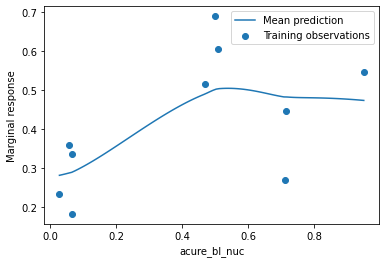

In [39]:
inputs_to_train = list(['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph'])
input_to_view = inputs_to_train[0]
print('Selected inputs : ', inputs_to_train)

X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)

## Selected inputs

In [33]:
X, y = set_up(coastal, inputs=few_inputs)

my_model = train_GP_pipe(X, y)

print(my_model)

c3.GaussianProcessRegressionPipe(
 noTrainScore=False,
 untrainableOverride=False,
 technique=c3.GaussianProcessRegressionTechnique(
             randomState=0,
             kernel=c3.SklearnGPRKernel(
                      name='Matern',
                      hyperParameters=c3.Mapp<string, any>({'coefficient': 1.0,
                                        'lengthScale': c3.Arry<double>([1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                        1.0,
                                                       

In [34]:
kernel = kernel_GP_pipe(my_model)
print(kernel)

{'k1': 0.38**2, 'k2': Matern(length_scale=[7.03e+04, 3.7e+04, 3.73, 1e+05, 4.07e+04, 1e+05, 1e+05, 9.15, 1e+05, 5.33, 1e+05, 1e+05, 1e+05, 3.98e+03, 4.65e+04, 1e+05, 1e+05, 1.09e+04, 1e+05, 9.92e+04, 1e+05, 1e+05, 1e+05, 1e+05, 1e+05, 2.48e+04, 2.8e+04, 1e+05, 11.1, 5.31e+04, 8.09e+04, 8.51e+04, 7.29e+04, 1e+05, 1e+05, 7.5e+04], nu=0.5), 'k1__constant_value': 0.14474785010912872, 'k1__constant_value_bounds': (1e-05, 100000.0), 'k2__length_scale': array([7.02576954e+04, 3.69846669e+04, 3.73108249e+00, 1.00000000e+05,
       4.07499625e+04, 1.00000000e+05, 1.00000000e+05, 9.14504232e+00,
       1.00000000e+05, 5.33162602e+00, 1.00000000e+05, 1.00000000e+05,
       1.00000000e+05, 3.98079809e+03, 4.64661706e+04, 1.00000000e+05,
       1.00000000e+05, 1.09050676e+04, 1.00000000e+05, 9.92475688e+04,
       1.00000000e+05, 1.00000000e+05, 1.00000000e+05, 1.00000000e+05,
       1.00000000e+05, 2.48145885e+04, 2.79511500e+04, 1.00000000e+05,
       1.11372760e+01, 5.31049787e+04, 8.09302705e+0

Selected inputs :  ['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph']


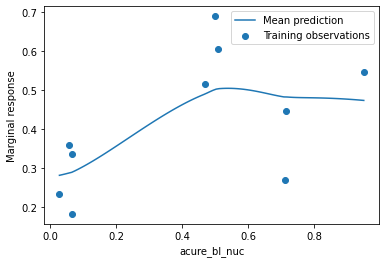

In [36]:
inputs_to_train = list(['acure_bl_nuc', 'acure_ait_width', 'acure_cloud_ph'])
input_to_view = inputs_to_train[0]
print('Selected inputs : ', inputs_to_train)

X_test_points, predictions, mean_predictions = view_GP_curve(X, y, inputs_to_train, input_to_view, 100)